<a href="https://colab.research.google.com/github/ingridcos/exercicios-praticos/blob/main/Tipos_de_Gr%C3%A1ficos_Comparativos_(parte_5)_Semana_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# importar biblioteca e carregar os dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carregar os dados
df = pd.read_csv('financas_pessoais.csv')

# configurar o estilo
sns.set_style('whitegrid')

# ver as primeiras linhas
print(df.head())

# length => comprimento / tamanho
print(f'\nTotal de Registros: {len(df)}')

# listar as colunas -> df.columns
print(f'\nColunas: {df.columns}')



       Mes    Categoria  Valor           Tipo Forma_Pagamento
0  Janeiro  Alimentação    802      Essencial             PIX
1  Janeiro   Transporte    392      Essencial        Dinheiro
2  Janeiro        Saúde    306      Essencial             PIX
3  Janeiro        Lazer    438  Não-essencial          Débito
4  Janeiro     Educação    252      Essencial         Crédito

Total de Registros: 72

Colunas: Index(['Mes', 'Categoria', 'Valor', 'Tipo', 'Forma_Pagamento'], dtype='object')


# Pergunta 1: Como meus gastos evoluíram ao longo do tempo?

- gráfico de linha => mostra tendência ao longo do tempo

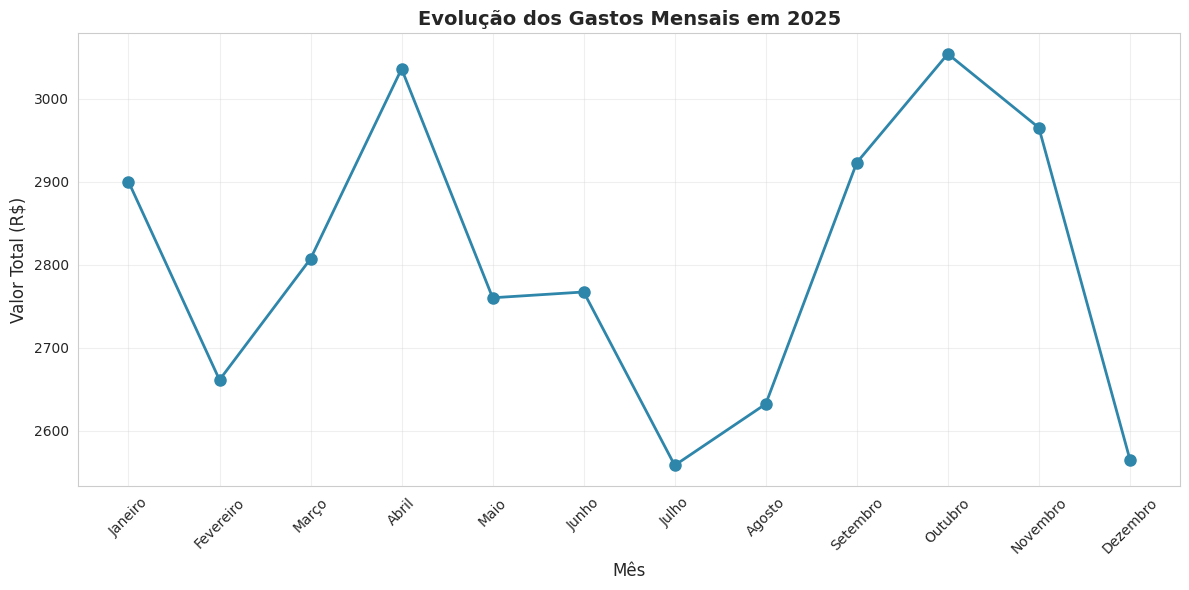

In [24]:
gastos_mes = df.groupby('Mes')['Valor'].sum().reindex(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Criar o gráfico de linhas
plt.figure(figsize=(12,6))
plt.plot(gastos_mes.index, gastos_mes.values,
         marker='o', linewidth=2, markersize=8, color='#2E86AB')

plt.title('Evolução dos Gastos Mensais em 2025', fontsize=14, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor Total (R$)', fontsize=12)

plt.xticks(rotation=45) # girar o rótulo do eixo x em 45 graus
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Pergunta 2: Qual categoria que eu gasto mais?

- gráfico de barras = Para comparar valores entre categorias diferentes

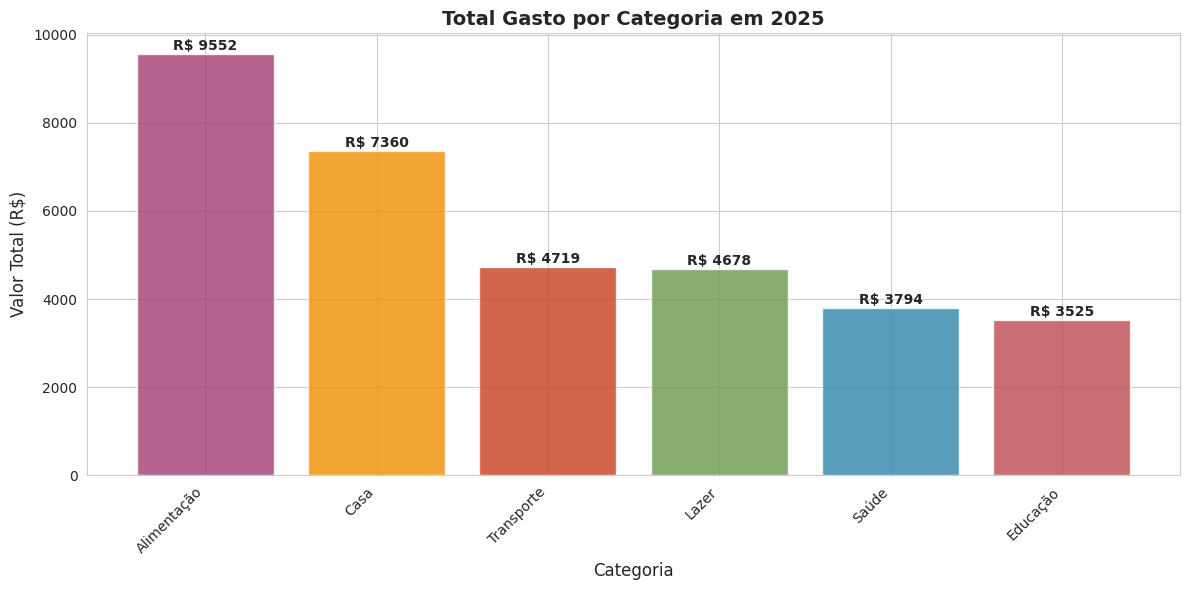

In [26]:
gastos_categoria = df.groupby('Categoria')['Valor'].sum().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
cores = ['#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#2E86AB', '#BC4B51']
plt.bar(gastos_categoria.index, gastos_categoria.values, color=cores, alpha=0.8) #alpha=0.8 -- transparência da linha de fundo


plt.title('Total Gasto por Categoria em 2025', fontsize=14, fontweight='bold')
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Valor Total (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right') # girar o rótulo do eixo x em 45 graus e alinhar a direita

for i, valor in enumerate(gastos_categoria.values):
    plt.text(i, valor + 100, f'R$ {valor:.0f}',
             ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Pergunta 3: Qual a proporção dos meus gastos?
- Gráfico de pizza

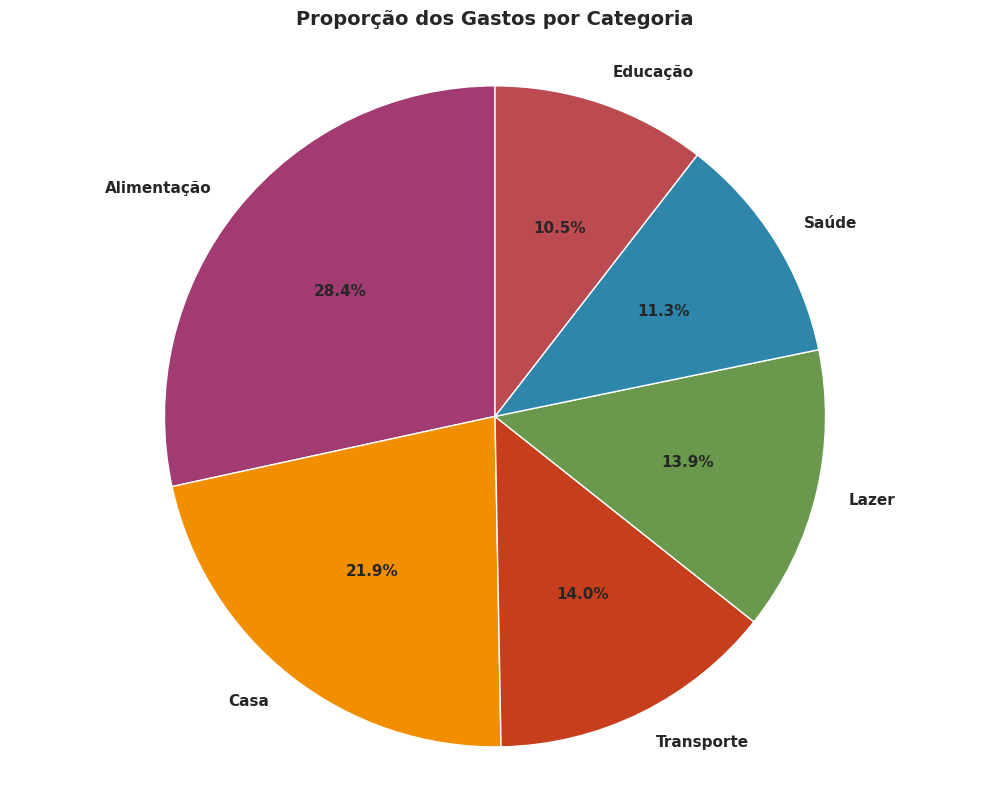

In [27]:
# Criar gráfico de pizza

plt.figure(figsize=(10,8))

cores_pizza = ['#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#2E86AB', '#BC4B51']


plt.pie(gastos_categoria.values, labels=gastos_categoria.index,
        autopct='%1.1f%%', startangle=90, colors=cores_pizza,
        textprops={'fontsize': 11, 'fontweight': 'bold'})

# pad=20 = espaçamento = padding
plt.title('Proporção dos Gastos por Categoria', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pergunta 4: Como cada categoria se comportou mês a mês?

- Gráfico de barras - empilhadas

df.pivot_table(
    <br> values='Valor',      # o que você quer ver (os números)
    <br> index='Mes',         # o que vai nas linhas
    <br> columns='Categoria', # o que vai nas colunas
    <br> aggfunc='sum'        # como combinar (somar)
<br>)

# ANTES (dados originais em lista):
**Mes..................Categoria............Valor** <br>
Janeiro...............Comida...................800 <br>
Janeiro...............Casa........................600 <br>
Fevereiro............Comida...................750 <br>
Fevereiro............Casa........................620 <br>

# DEPOIS do pivot_table:
**Categoria....Comida....Casa** <br>
Mes <br>
Janeiro...........800............600 <br>
Fevereiro.........750............620 <br>

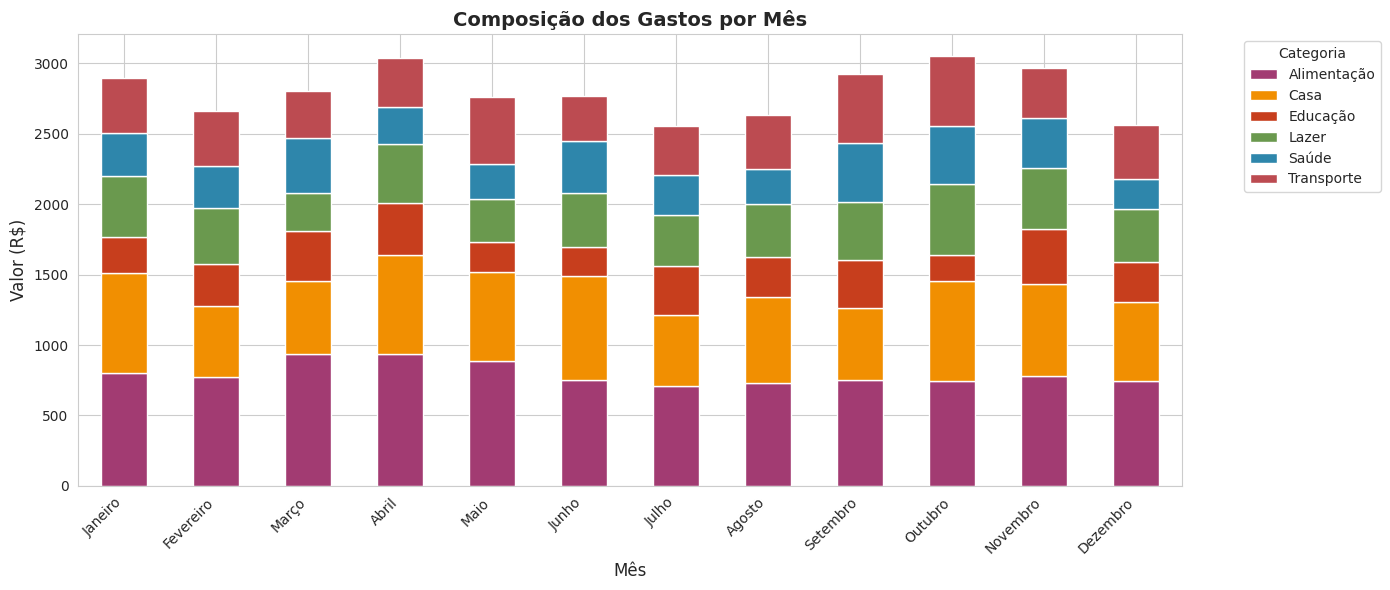

In [28]:
# Preparar dados para barras empilhadas

pivot_df = df.pivot_table(values='Valor', index='Mes', columns='Categoria', aggfunc='sum')
pivot_df = pivot_df.reindex([
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
])

# Criar gráfico de barras empilhadas
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6),
              color=['#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#2E86AB', '#BC4B51'])

plt.title('Composição dos Gastos por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor (R$)', fontsize=12)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#EXERCÍCIO: ANALISANDO VENDAS DE UMA LOJA


#Objetivos:

● Aplicar diferentes tipos de gráficos

● Escolher o gráfico adequado

● Criar visualizações comparativas

● Interpretar os resultados

#Tarefas:
Você trabalha em uma loja de roupas e precisa analisar as vendas de 2024. Você tem
dados de vendas por mês, por categoria de produto e por forma de pagamento. Seu
objetivo é criar visualizações que ajudem a tomar decisões sobre estoque e promoções.

#PARTE 1: Preparar os Dados
1. Garantir que a coluna Data está em formato datetime
2. Criar coluna com o mês extraído da data
3. Criar coluna com o dia da semana
4. Verificar se não há dados faltantes

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# Carregar e explorar dados
# ========================
df = pd.read_csv("vendas_loja_roupas.csv")
print(df.head())
print("\nColunas:", df.columns)

sns.set_style("whitegrid")

         Mes   Categoria  Vendas Forma_Pagamento
0    Janeiro   Camisetas    3000             PIX
1    Janeiro      Calças    2500        Dinheiro
2    Janeiro    Vestidos    2000         Crédito
3    Janeiro  Acessórios    1500             PIX
4  Fevereiro   Camisetas    3200             PIX

Colunas: Index(['Mes', 'Categoria', 'Vendas', 'Forma_Pagamento'], dtype='object')


#PARTE 2: Gráfico de Linhas
1. Pergunta: Como as vendas evoluíram ao longo do ano?
2. Criar um gráfico de linhas mostrando o total de vendas por mês
3. Adicionar título, rótulos e grade
4. Usar marcadores nos pontos
5. Interpretar: Em quais meses as vendas foram maiores? Por quê?


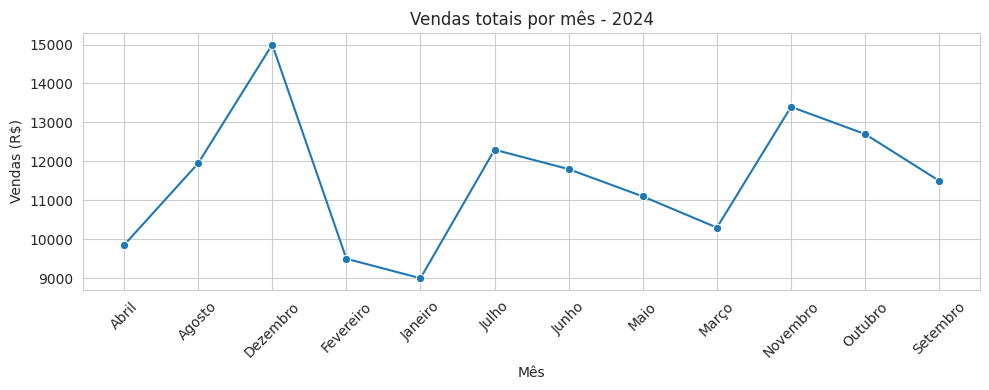

In [30]:
# PARTE 2 – Gráfico de linhas
# Pergunta: Como as vendas evoluíram ao longo do ano?
# ========================
vendas_mes = df.groupby("Mes")["Vendas"].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=vendas_mes, x="Mes", y="Vendas", marker="o")
plt.title("Vendas totais por mês - 2024")
plt.xlabel("Mês")
plt.ylabel("Vendas (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#PARTE 3: Gráfico de Barras
1. Pergunta: Qual categoria de produto vende mais?
2. Criar um gráfico de barras comparando vendas por categoria
3. Ordenar da maior para menor venda
4. Adicionar os valores em cima de cada barra
5. Interpretar: Qual produto deveria ter mais estoque?

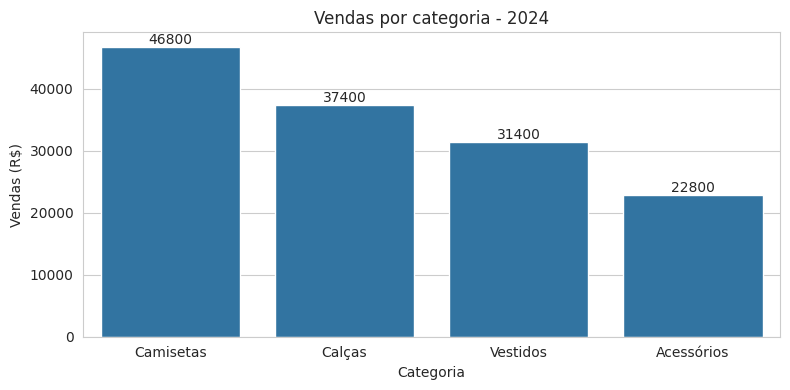

In [31]:
# PARTE 3 – Gráfico de barras por categoria
# Pergunta: Qual categoria de produto vende mais?
# ========================
vendas_cat = df.groupby("Categoria")["Vendas"].sum().reset_index()
vendas_cat = vendas_cat.sort_values("Vendas", ascending=False)

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=vendas_cat, x="Categoria", y="Vendas")
plt.title("Vendas por categoria - 2024")
plt.xlabel("Categoria")
plt.ylabel("Vendas (R$)")

# adicionar valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

#PARTE 4: Gráfico de Pizza
6. Pergunta: Qual a proporção de cada forma de pagamento?
7. Agrupar os dados por forma de pagamento
8. Criar um gráfico de pizza mostrando as proporções
9. Incluir percentuais automáticos
10. Interpretar: Os clientes preferem qual forma de pagamento?

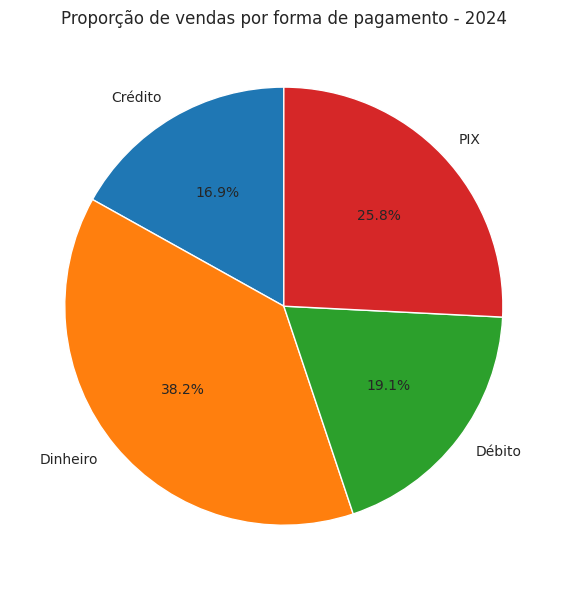

In [32]:
# PARTE 4 – Gráfico de pizza
# Pergunta: Qual a proporção de cada forma de pagamento?
# ========================
vendas_pag = df.groupby("Forma_Pagamento")["Vendas"].sum()

plt.figure(figsize=(6, 6))
plt.pie(vendas_pag,
        labels=vendas_pag.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Proporção de vendas por forma de pagamento - 2024")
plt.tight_layout()
plt.show()


#PARTE 5: Barras Empilhadas
1. Pergunta: Como cada categoria contribuiu para as vendas mensais?
2. Criar uma pivot table com meses e categorias
3. Fazer um gráfico de barras empilhadas
4. Posicionar legenda fora do gráfico
5. Interpretar: Qual categoria é mais consistente ao longo do ano?

<Figure size 1000x500 with 0 Axes>

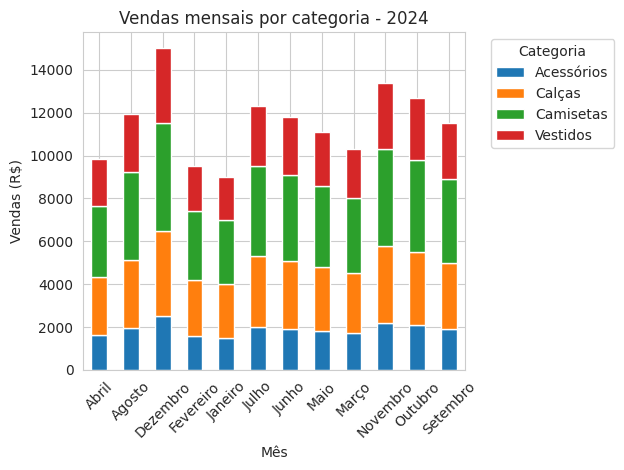

In [33]:
# PARTE 5 – Barras empilhadas
# Pergunta: Como cada categoria contribuiu para as vendas mensais?
# ========================
tabela_pivot = df.pivot_table(values="Vendas",
                              index="Mes",
                              columns="Categoria",
                              aggfunc="sum")

plt.figure(figsize=(10, 5))
tabela_pivot.plot(kind="bar", stacked=True)
plt.title("Vendas mensais por categoria - 2024")
plt.xlabel("Mês")
plt.ylabel("Vendas (R$)")
plt.xticks(rotation=45)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#PARTE 6: Análise Final
1. Baseado em todos os gráficos criados, responda:
2. a) Qual mês teve melhor desempenho geral?
3. b) Qual categoria merece mais investimento?
4. c) Qual forma de pagamento deveria ser incentivada?
5. d) Que insights você compartilharia com a gerência?

In [35]:
# ===== PARTE 6 – Análise Final =====

# a) Qual mês teve melhor desempenho geral?
vendas_mes = df.groupby("Mes")["Vendas"].sum().sort_values(ascending=False)
melhor_mes = vendas_mes.idxmax()
melhor_valor = vendas_mes.max()

print(f"(a) Melhor mês: {melhor_mes} com vendas totais de R$ {melhor_valor:.2f}")

# b) Qual categoria merece mais investimento?
vendas_cat = df.groupby("Categoria")["Vendas"].sum().sort_values(ascending=False)
melhor_categoria = vendas_cat.idxmax()
valor_cat = vendas_cat.max()

print(f"(b) Categoria com maior venda no ano: {melhor_categoria} (R$ {valor_cat:.2f})")

# c) Qual forma de pagamento deveria ser incentivada?
vendas_pag = df.groupby("Forma_Pagamento")["Vendas"].sum().sort_values(ascending=False)
melhor_pag = vendas_pag.idxmax()
valor_pag = vendas_pag.max()

print(f"(c) Forma de pagamento mais usada em valor de vendas: {melhor_pag} (R$ {valor_pag:.2f})")

# d) Insights para a gerência
print("(d) Insights sugeridos:")
print("- Reforçar estoque e promoções em", melhor_categoria, "nos meses de maior venda,", melhor_mes)
print("- Incentivar o uso de", melhor_pag, "com descontos ou programas de fidelidade")
print("- Usar os gráficos para identificar meses fracos e planejar campanhas específicas")


(a) Melhor mês: Dezembro com vendas totais de R$ 15000.00
(b) Categoria com maior venda no ano: Camisetas (R$ 46800.00)
(c) Forma de pagamento mais usada em valor de vendas: Dinheiro (R$ 52900.00)
(d) Insights sugeridos:
- Reforçar estoque e promoções em Camisetas nos meses de maior venda, Dezembro
- Incentivar o uso de Dinheiro com descontos ou programas de fidelidade
- Usar os gráficos para identificar meses fracos e planejar campanhas específicas


#COMPLETO


         Mes   Categoria  Vendas Forma_Pagamento
0    Janeiro   Camisetas    3000             PIX
1    Janeiro      Calças    2500        Dinheiro
2    Janeiro    Vestidos    2000         Crédito
3    Janeiro  Acessórios    1500             PIX
4  Fevereiro   Camisetas    3200             PIX

Colunas: Index(['Mes', 'Categoria', 'Vendas', 'Forma_Pagamento'], dtype='object')


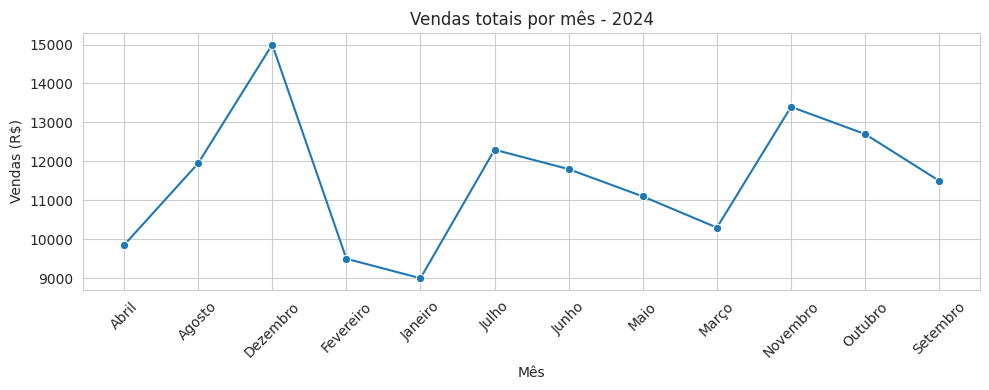

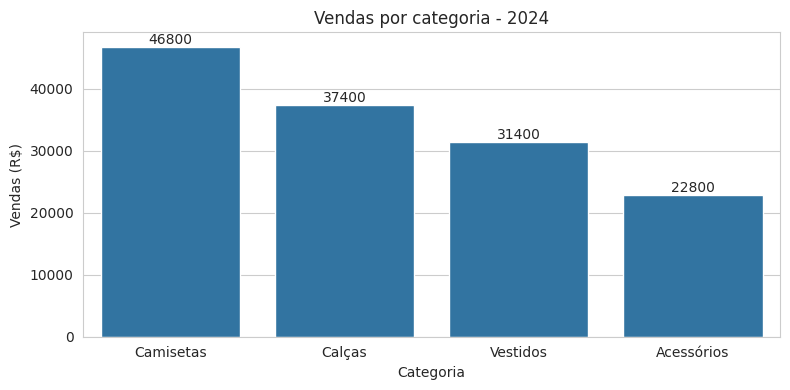

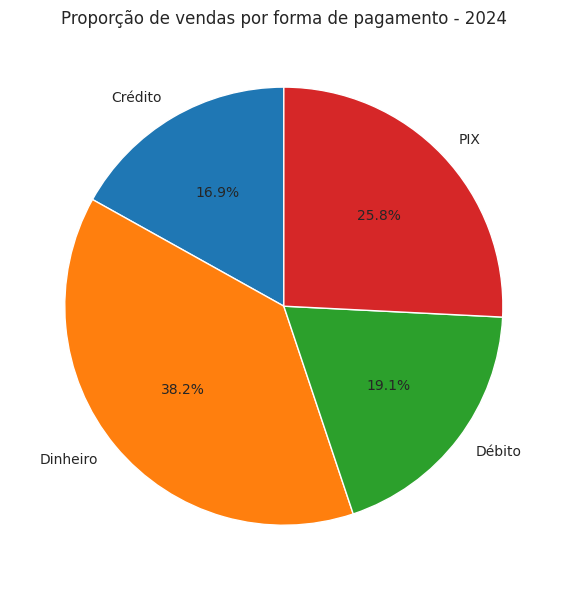

<Figure size 1000x500 with 0 Axes>

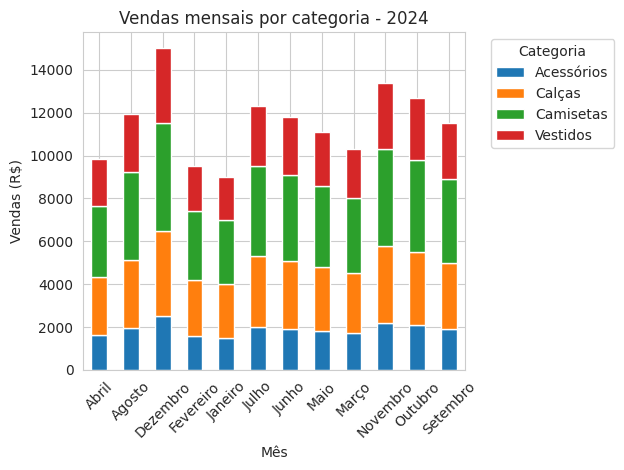

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# Carregar e explorar dados
# ========================
df = pd.read_csv("vendas_loja_roupas.csv")  # Mes, Categoria, Vendas, Forma_Pagamento
print(df.head())
print("\nColunas:", df.columns)

sns.set_style("whitegrid")

# ========================
# PARTE 2 – Gráfico de linhas
# Pergunta: Como as vendas evoluíram ao longo do ano?
# ========================
vendas_mes = df.groupby("Mes")["Vendas"].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=vendas_mes, x="Mes", y="Vendas", marker="o")
plt.title("Vendas totais por mês - 2024")
plt.xlabel("Mês")
plt.ylabel("Vendas (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========================
# PARTE 3 – Gráfico de barras por categoria
# Pergunta: Qual categoria de produto vende mais?
# ========================
vendas_cat = df.groupby("Categoria")["Vendas"].sum().reset_index()
vendas_cat = vendas_cat.sort_values("Vendas", ascending=False)

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=vendas_cat, x="Categoria", y="Vendas")
plt.title("Vendas por categoria - 2024")
plt.xlabel("Categoria")
plt.ylabel("Vendas (R$)")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

# ========================
# PARTE 4 – Gráfico de pizza
# Pergunta: Qual a proporção de cada forma de pagamento?
# ========================
vendas_pag = df.groupby("Forma_Pagamento")["Vendas"].sum()

plt.figure(figsize=(6, 6))
plt.pie(vendas_pag,
        labels=vendas_pag.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Proporção de vendas por forma de pagamento - 2024")
plt.tight_layout()
plt.show()

# ========================
# PARTE 5 – Barras empilhadas
# Pergunta: Como cada categoria contribuiu para as vendas mensais?
# ========================
tabela_pivot = df.pivot_table(values="Vendas",
                              index="Mes",
                              columns="Categoria",
                              aggfunc="sum")

plt.figure(figsize=(10, 5))
tabela_pivot.plot(kind="bar", stacked=True)
plt.title("Vendas mensais por categoria - 2024")
plt.xlabel("Mês")
plt.ylabel("Vendas (R$)")
plt.xticks(rotation=45)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [39]:
# ===== PARTE 6 – Análise Final =====

# a) Qual mês teve melhor desempenho geral?
vendas_mes = df.groupby("Mes")["Vendas"].sum().sort_values(ascending=False)
melhor_mes = vendas_mes.idxmax()
melhor_valor = vendas_mes.max()

print(f"(a) Melhor mês: {melhor_mes} com vendas totais de R$ {melhor_valor:.2f}")

# b) Qual categoria merece mais investimento?
vendas_cat = df.groupby("Categoria")["Vendas"].sum().sort_values(ascending=False)
melhor_categoria = vendas_cat.idxmax()
valor_cat = vendas_cat.max()

print(f"(b) Categoria com maior venda no ano: {melhor_categoria} (R$ {valor_cat:.2f})")

# c) Qual forma de pagamento deveria ser incentivada?
vendas_pag = df.groupby("Forma_Pagamento")["Vendas"].sum().sort_values(ascending=False)
melhor_pag = vendas_pag.idxmax()
valor_pag = vendas_pag.max()

print(f"(c) Forma de pagamento mais usada em valor de vendas: {melhor_pag} (R$ {valor_pag:.2f})")

# d) Insights para a gerência
print("(d) Insights sugeridos:")
print("- Reforçar estoque e promoções em", melhor_categoria, "nos meses de maior venda,", melhor_mes)
print("- Incentivar o uso de", melhor_pag, "com descontos ou programas de fidelidade")
print("- Usar os gráficos para identificar meses fracos e planejar campanhas específicas")


(a) Melhor mês: Dezembro com vendas totais de R$ 15000.00
(b) Categoria com maior venda no ano: Camisetas (R$ 46800.00)
(c) Forma de pagamento mais usada em valor de vendas: Dinheiro (R$ 52900.00)
(d) Insights sugeridos:
- Reforçar estoque e promoções em Camisetas nos meses de maior venda, Dezembro
- Incentivar o uso de Dinheiro com descontos ou programas de fidelidade
- Usar os gráficos para identificar meses fracos e planejar campanhas específicas


Primeiras linhas:
         Mes   Categoria  Vendas Forma_Pagamento
0    Janeiro   Camisetas    3000             PIX
1    Janeiro      Calças    2500        Dinheiro
2    Janeiro    Vestidos    2000         Crédito
3    Janeiro  Acessórios    1500             PIX
4  Fevereiro   Camisetas    3200             PIX

Total de registros: 48
Categorias: ['Camisetas' 'Calças' 'Vestidos' 'Acessórios']


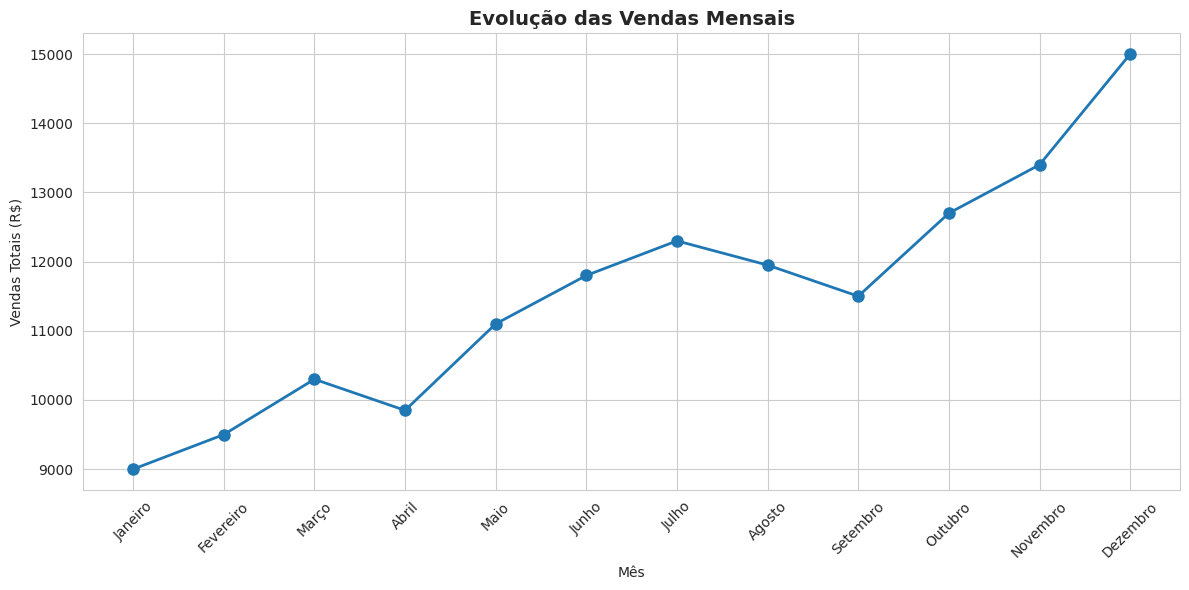


As vendas cresceram ao longo do ano, com pico em dezembro


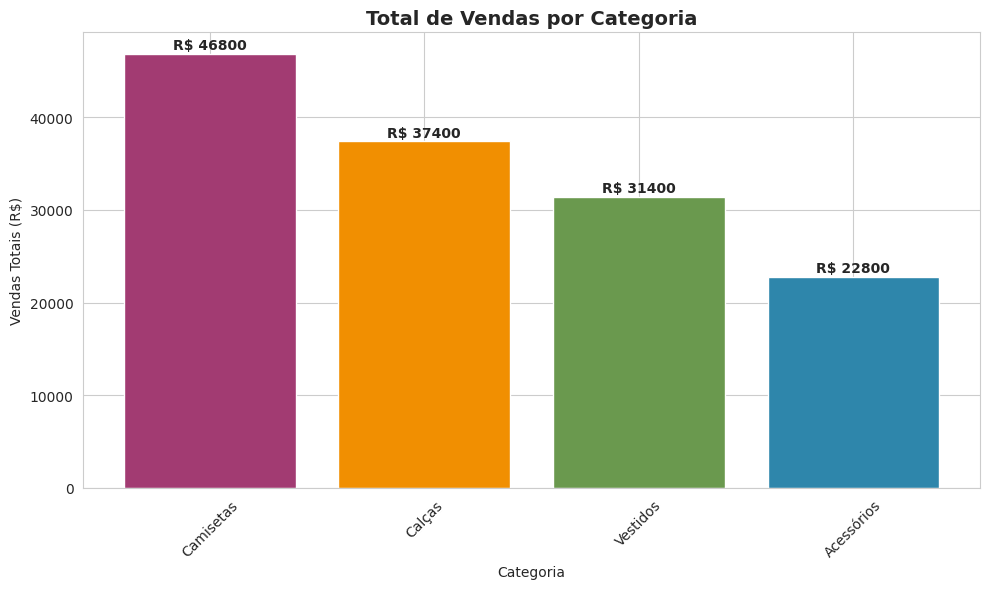


Camisetas são a categoria que mais vende


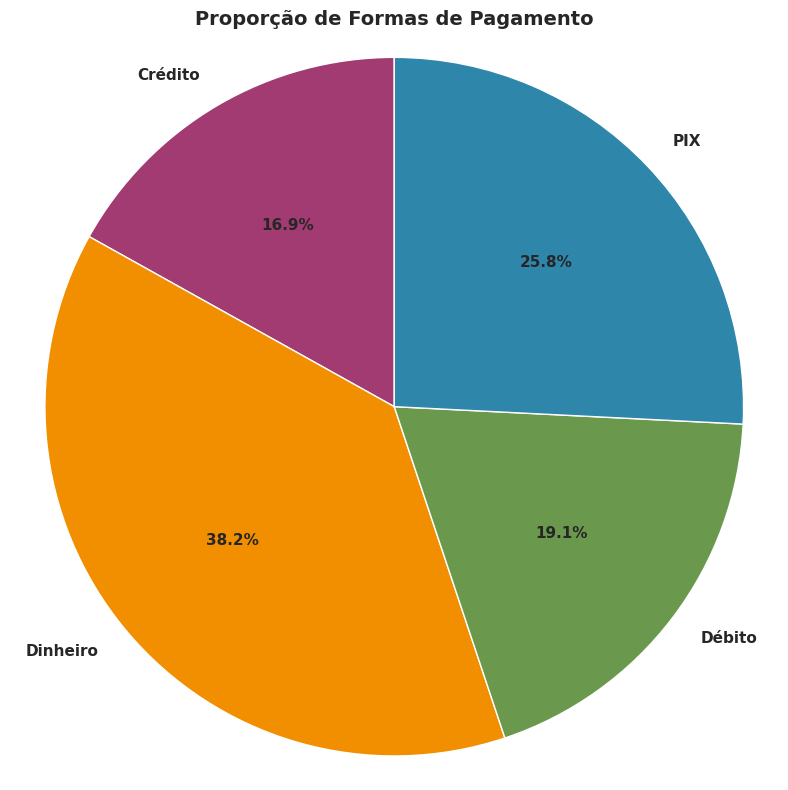


Dinheiro é a forma de pagamento mais usada


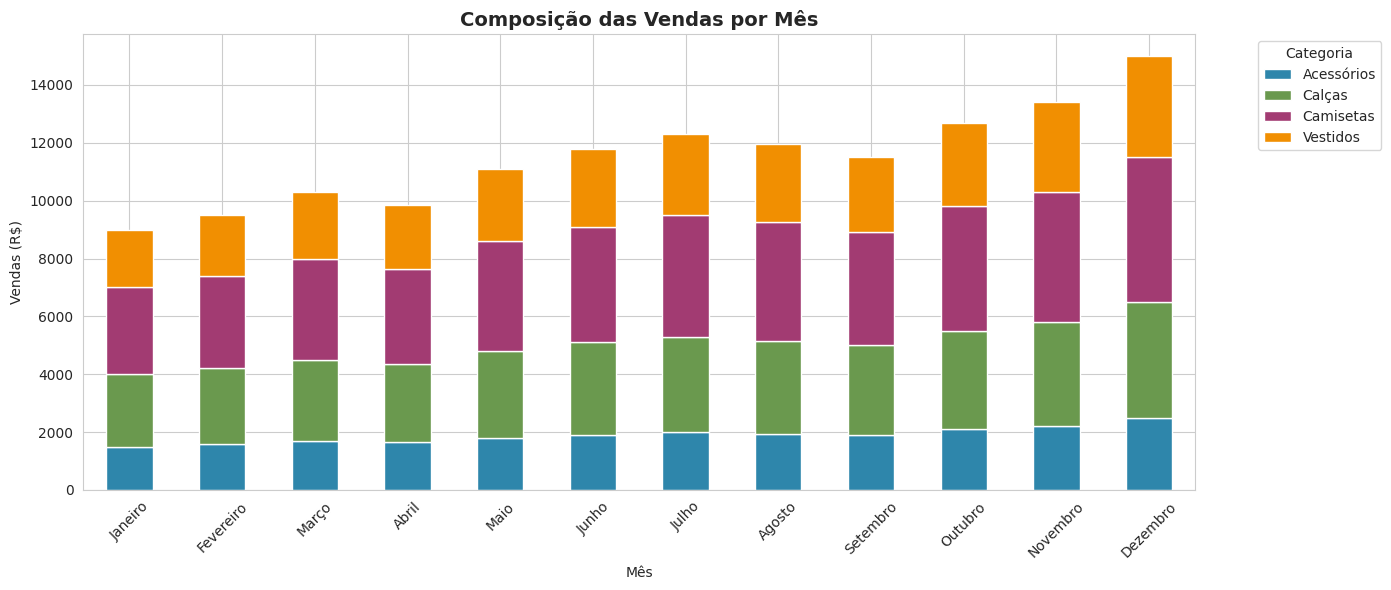


Camisetas dominam as vendas em todos os meses

ANÁLISE FINAL

a) Mês com melhor desempenho: Dezembro (R$ 15000)

b) Categoria que merece mais investimento: Camisetas (R$ 46800)

c) Forma de pagamento predominante: Dinheiro

d) Insights para a gerência:
   - Dezembro tem vendas excepcionais, manter estoque alto
   - Camisetas são o carro-chefe, priorizar variedade
   - Facilitar a forma de pagamento preferida pelos clientes
   - Crescimento constante indica que a estratégia está funcionando

Análise completa


In [40]:
# ========================================
# SOLUÇÃO - EXERCÍCIO AULA 6
# Analisando Vendas de uma Loja de Roupas
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ========================================
# PARTE 1: CARREGAR OS DADOS
# ========================================

# Carregar dados (fazer upload do vendas_loja_roupas.csv antes)
df = pd.read_csv('vendas_loja_roupas.csv')

print("Primeiras linhas:")
print(df.head())

print(f"\nTotal de registros: {len(df)}")
print(f"Categorias: {df['Categoria'].unique()}")

# ========================================
# PARTE 2: GRÁFICO DE LINHAS
# Como as vendas evoluíram ao longo do ano
# ========================================

# Ordem correta dos meses
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
         'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Calcular total por mês
vendas_mes = df.groupby('Mes')['Vendas'].sum().reindex(meses)

plt.figure(figsize=(12, 6))
plt.plot(vendas_mes.index, vendas_mes.values, marker='o', linewidth=2, markersize=8)
plt.title('Evolução das Vendas Mensais', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nAs vendas cresceram ao longo do ano, com pico em dezembro")

# ========================================
# PARTE 3: GRÁFICO DE BARRAS
# Qual categoria vende mais
# ========================================

# Calcular total por categoria
vendas_categoria = df.groupby('Categoria')['Vendas'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cores = ['#A23B72', '#F18F01', '#6A994E', '#2E86AB']
plt.bar(vendas_categoria.index, vendas_categoria.values, color=cores)
plt.title('Total de Vendas por Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Categoria')
plt.ylabel('Vendas Totais (R$)')
plt.xticks(rotation=45)

# Adicionar valores nas barras
for i, valor in enumerate(vendas_categoria.values):
    plt.text(i, valor + 500, f'R$ {valor:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCamisetas são a categoria que mais vende")

# ========================================
# PARTE 4: GRÁFICO DE PIZZA
# Qual a proporção de cada forma de pagamento
# ========================================

# Agrupar por forma de pagamento
vendas_pagamento = df.groupby('Forma_Pagamento')['Vendas'].sum()

plt.figure(figsize=(8, 8))
cores_pizza = ['#A23B72', '#F18F01', '#6A994E', '#2E86AB']
plt.pie(vendas_pagamento.values, labels=vendas_pagamento.index,
        autopct='%1.1f%%', colors=cores_pizza, startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Proporção de Formas de Pagamento', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

forma_principal = vendas_pagamento.idxmax()
print(f"\n{forma_principal} é a forma de pagamento mais usada")

# ========================================
# PARTE 5: BARRAS EMPILHADAS
# Como cada categoria contribuiu mês a mês
# ========================================

# Criar pivot table
pivot_df = df.pivot_table(values='Vendas', index='Mes', columns='Categoria')
pivot_df = pivot_df.reindex(meses)

pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6),
              color=['#2E86AB', '#6A994E', '#A23B72', '#F18F01'])
plt.title('Composição das Vendas por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Vendas (R$)')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nCamisetas dominam as vendas em todos os meses")

# ========================================
# PARTE 6: ANÁLISE FINAL
# ========================================

print("\n" + "="*50)
print("ANÁLISE FINAL")
print("="*50)

print(f"\na) Mês com melhor desempenho: {vendas_mes.idxmax()} (R$ {vendas_mes.max():.0f})")
print(f"\nb) Categoria que merece mais investimento: {vendas_categoria.index[0]} (R$ {vendas_categoria.iloc[0]:.0f})")
print(f"\nc) Forma de pagamento predominante: {forma_principal}")

print("\nd) Insights para a gerência:")
print("   - Dezembro tem vendas excepcionais, manter estoque alto")
print("   - Camisetas são o carro-chefe, priorizar variedade")
print("   - Facilitar a forma de pagamento preferida pelos clientes")
print("   - Crescimento constante indica que a estratégia está funcionando")

print("\nAnálise completa")